# 0.0 imports

In [1]:
import os 

import inflection 
import numpy as np
import pandas as pd
import seaborn as sns 
import statsmodels.api as sm 

from matplotlib import pyplot as plt

## 0.1 Help fucntion

## 0.2. Load Dataset 

In [2]:
df = pd.read_csv('/home/win/Documentos/pa06/data/df_ready.csv', encoding='latin1')


Category_name
name 
merchant
condition

Observas as datas 
Date_imp
Date_imp_d
Date_imp_d.1
Day_n
month 
month_n
day
Week_Number
sourceURLs 


In [3]:
df1 = df

In [4]:
df1['condition'].unique()

array(['New'], dtype=object)

In [5]:
df1['merchant'].unique()
# É o site de qual empresa vem o dado

array(['Walmart.com', 'Bestbuy.com', 'bhphotovideo.com', 'ebay.com',
       'Amazon.com', 'kmart.com', 'barcodable.com'], dtype=object)

In [6]:
df1['sourceURLs'].unique()
# Esse link não tem informação para mim, pois o merchant me diz da onde vem

array(['https://www.walmart.com/ip/BOYTONE-BT210FB-BLACK-2-1-MULTIMEDIA-SPEAKER-SYSTEM-WITH/47368142',
       'https://www.walmart.com/ip/Boytone-BT-210F-Bluetooth-Speaker/47368142',
       'https://www.bestbuy.com/site/boytone-2500w-2-1-ch-home-theater-system-black-diamond/4784804.p%25253FskuId%25253D4784804',
       ...,
       'http://www.bestbuy.com/site/naxa-2-1-channel-soundbar-with-50-watt-digital-amplifier-black/5763749.p%253FskuId%253D5763749',
       'https://www.bestbuy.com/site/naxa-2-1-channel-soundbar-with-50-watt-digital-amplifier-black/5763749.p%253FskuId%253D5763749,http://www.bestbuy.com/site/naxa-2-1-channel-soundbar-with-50-watt-digital-amplifier-black/5763749.p%253FskuId%253D5763749',
       'https://www.walmart.com/ip/Naxa-42-Sound-bar-with-bluetooth-built-in-subwoofer/44184075'],
      dtype=object)

In [7]:
# Analisando os dados 
df1.head()


,Unnamed: 0,Date_imp,Date_imp_d,Cluster,Category_name,name,price,disc_price,merchant,condition,...,sourceURLs,weight,Date_imp_d.1,Day_n,month,month_n,day,Week_Number,Zscore_1,price_std
0,4,2017-12-14 06:00:00,2017/12/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,New,...,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,14 pounds,2017/12/14,Thursday,12,December,14,50,0.001525,3.880725
1,5,2017-09-08 05:00:00,2017/09/08,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/08,Friday,9,September,8,36,0.001525,3.880725
2,6,2017-10-24 04:00:00,2017/10/24,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/10/24,Tuesday,10,October,24,43,-0.760844,3.880725
3,7,2017-08-15 15:00:00,2017/08/15,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/08/15,Tuesday,8,August,15,33,1.523722,3.880725
4,8,2017-09-14 21:00:00,2017/09/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/14,Thursday,9,September,14,37,0.253107,3.880725


In [8]:
df1['Category_name'].unique()

array(['speaker, portable, bluetooth', 'remote, control, tv',
       'sound, speaker, home', 'memory, computer, component',
       'drive, storage, internal', 'car, speaker, subwoofer',
       'power, battery, cell', 'headphone, earbud, ear',
       'case, keyboard, tablet', 'camera, bag', 'tv, television, video',
       'mount, tv, stand', 'receiver, amplifier, home',
       'computer, charger, laptop', 'screen, projector, projection',
       'radio, portable, satellite', 'car, receiver, dash',
       'headset, game, computer', 'speaker, wireless, audio',
       'shelf, tabletop, audio', 'player, home, audio',
       'camcorder, camera, action', 'speaker, audio, home',
       'security, surveillance, camera', 'adapter, networking, usb',
       'car, camera, dash', 'drive, storage, hard', 'phone, cell',
       'monitor, computer', 'speaker, subwoofer, separate', 'desktop',
       'camera, shoot', 'lens, camera', 'headphone',
       'headphone, used, audio', 'mouse, keyboard',
       'n

In [9]:
df1['Unnamed: 0'].unique()

array([    4,     5,     6, ..., 29590, 29591, 29592])

* coluna 'Unnamed: 8' deve ser dropada!
* coluna 'sourceURLs' deve ser dropada!
* coluna 'condition'

In [10]:
df1.drop( columns = 'Unnamed: 0',  inplace = True)
df1.drop( columns = 'sourceURLs',  inplace = True)
df1.drop( columns = 'condition', inplace = True)
# Inicialmente vou dropar estás colunas
#df1.drop( columns = '', inplace = True)

# 1. Data Description

**Contexto**

Dados de comércio Eletrônico




## 1.1 Rename Columns

In [11]:
list(df1.columns)

['Date_imp',
 'Date_imp_d',
 'Cluster',
 'Category_name',
 'name',
 'price',
 'disc_price',
 'merchant',
 'Disc_percentage',
 'isSale',
 'Imp_count',
 'brand',
 'p_description',
 'currency',
 'dateAdded',
 'dateSeen',
 'dateUpdated',
 'imageURLs',
 'manufacturer',
 'shipping',
 'weight',
 'Date_imp_d.1',
 'Day_n',
 'month',
 'month_n',
 'day',
 'Week_Number',
 'Zscore_1',
 'price_std']

In [12]:
cols_old = list(df1.columns)

snakecase = lambda x : inflection.underscore( x )
cols_new = list(map(snakecase, cols_old))

df1.columns = cols_new


## 1.2 Data Dimensions

In [13]:
print('Number of Rows: {}'.format( df1.shape[0]))
print('Number of Cols: {}'.format( df1.shape[1]))

Number of Rows: 23151
Number of Cols: 29


## 1.3 Data Types

In [14]:
df1.dtypes

date_imp            object
date_imp_d          object
cluster              int64
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
currency            object
date_added          object
date_seen           object
date_updated        object
image_ur_ls         object
manufacturer        object
shipping            object
weight              object
date_imp_d.1        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
zscore_1           float64
price_std          float64
dtype: object

In [15]:
df1['month_n'].unique()

array(['December', 'September', 'October', 'August', 'July', 'May',
       'April', 'March', 'June', 'November', 'January'], dtype=object)

## 1.4 Check NA

In [16]:
df1.isna().sum() 

date_imp               0
date_imp_d             0
cluster                0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
currency               0
date_added             0
date_seen              0
date_updated           0
image_ur_ls        22696
manufacturer       10639
shipping           11497
weight                68
date_imp_d.1           0
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
zscore_1             171
price_std              0
dtype: int64

In [17]:
(df1.isna().sum() / len(df1)  ) *100

date_imp            0.000000
date_imp_d          0.000000
cluster             0.000000
category_name       0.000000
name                0.000000
price               0.000000
disc_price          0.000000
merchant            0.000000
disc_percentage     0.000000
is_sale             0.000000
imp_count           0.000000
brand               0.000000
p_description       0.000000
currency            0.000000
date_added          0.000000
date_seen           0.000000
date_updated        0.000000
image_ur_ls        98.034642
manufacturer       45.954818
shipping           49.660922
weight              0.293724
date_imp_d.1        0.000000
day_n               0.000000
month               0.000000
month_n             0.000000
day                 0.000000
week_number         0.000000
zscore_1            0.738629
price_std           0.000000
dtype: float64

REFLEXÃO p/ trabalhar com os NANs

**Objetivo do trabalho:** Calcular a elasticidade dos preços ! 

Formas de tratar os NAN:

    * Deletar ( df1.dropna() )
        * + (vantagem        -  Simples
        * - (Desvantagem )   -  Perda de informação
        * Goal               -  Depende da quantidade 
   
    * Preencher
        * + (vantagem        -  Mantém o tamanho original dos dados
        * - (Desvantagem )   -  Caso a distribuição n seja normal, pode fica com muito viés!
        * Goal               -  !
    
    * Interpolar
        * + (vantagem        -  Mantém a integridade de seres temporais 
        * - (Desvantagem )   -  Pode distorcer com informações falsas
        * Goal               -  
    
    * Modelos Estatísticos
        * + (vantagem        -  Abordagem mais sofisticada 
        * - (Desvantagem )   -  Reque muito recurso do computador e pode ser impreciso
        * Goal               -  

Conclusão: Melhor caminho baseado que nas colunas que tem não são tão relevante para o objetivos deletar elas é a melhor opção

## 1.5 Fillout NAN ou Null

###### Tentativa 1 ( X )

In [18]:
#drop image_ur_ls por ter maior parte dos seu dados perdidos
#df1['image_ur_ls'].unique() #url
#df1['manufacturer'].unique() #marcas do produto, Dropar também
#df1['shipping'].unique() # o frete, dropar também
#df1['zscore_1'].unique() # uma pontuação, dropar também
df1.drop(columns = 'image_ur_ls', inplace = True )
df1.drop( columns = 'manufacturer', inplace = True )
df1.drop( columns = 'shipping', inplace = True )
df1.drop( columns = 'zscore_1', inplace = True )

In [19]:
df1.isnull().sum()

date_imp            0
date_imp_d          0
cluster             0
category_name       0
name                0
price               0
disc_price          0
merchant            0
disc_percentage     0
is_sale             0
imp_count           0
brand               0
p_description       0
currency            0
date_added          0
date_seen           0
date_updated        0
weight             68
date_imp_d.1        0
day_n               0
month               0
month_n             0
day                 0
week_number         0
price_std           0
dtype: int64

###### Tentativa 2

## 1.6 Change Type

In [20]:
df1.dtypes

date_imp            object
date_imp_d          object
cluster              int64
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
currency            object
date_added          object
date_seen           object
date_updated        object
weight              object
date_imp_d.1        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
price_std          float64
dtype: object

In [21]:
# invoice_no
#df1['invoice_no']   = df1['invoice_no'].astype( int ) 
#Date_imp_d.1 	Day_n 	month 	month_n 	day 	Week_Number
#invoice date
df1['date_imp_d'] = pd.to_datetime(df1['date_imp_d'], format= '%Y/%m/%d') 
# Hours 

# Converter a coluna 'date_imp' para datetime
df1['date_imp'] = pd.to_datetime(df1['date_imp'], format='%Y-%m-%d %H:%M:%S')

# Agora você pode formatar a hora
df1['Hours'] = df1['date_imp'].dt.strftime('%H:%M:%S')#customer id
df1.dtypes



date_imp           datetime64[ns]
date_imp_d         datetime64[ns]
cluster                     int64
category_name              object
name                       object
price                     float64
disc_price                float64
merchant                   object
disc_percentage           float64
is_sale                    object
imp_count                   int64
brand                      object
p_description              object
currency                   object
date_added                 object
date_seen                  object
date_updated               object
weight                     object
date_imp_d.1               object
day_n                      object
month                       int64
month_n                    object
day                         int64
week_number                 int64
price_std                 float64
Hours                      object
dtype: object

 ## 1.7 Descriptive Statistics

In [22]:
num_attributes = df1.select_dtypes( include = ['int64', 'int32', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'int32', 'float64', 'datetime64[ns]'] )

## 1.7.1 Numerical Attributes

In [23]:
#central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion 
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m1 = pd.concat([d2 ,d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m1 = m1.drop([2])
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]
m1


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,cluster,0.000000,57.000000,57.000000,22.682735,20.000000,15.576482,0.312318,-1.010301
1,price,1.000000,10879.950000,10878.950000,513.037803,199.990000,859.091448,4.595160,34.411146
3,disc_percentage,0.000000,0.800000,0.800000,0.016933,0.000000,0.077847,5.217632,28.754920
4,imp_count,1.000000,31.000000,30.000000,6.560926,5.000000,5.403049,1.286351,1.639569
5,month,1.000000,12.000000,11.000000,7.651030,8.000000,2.592787,-0.099417,-0.628859
6,day,1.000000,31.000000,30.000000,15.693879,16.000000,9.681413,0.032258,-1.331838
7,week_number,1.000000,51.000000,50.000000,31.342750,32.000000,11.316253,-0.266980,-0.648027
8,price_std,0.004472,1423.902118,1423.897646,61.992819,18.764962,125.492418,4.857793,30.958918


## 1.7.2 Categorical Attributes

In [24]:
cat_attributes.head()

,category_name,name,merchant,is_sale,brand,p_description,currency,date_added,date_seen,date_updated,weight,date_imp_d.1,day_n,month_n,Hours
0,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,Yes,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/12/14,Thursday,December,06:00:00
1,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,No,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/09/08,Friday,September,05:00:00
2,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,No,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/10/24,Tuesday,October,04:00:00
3,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,No,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/08/15,Tuesday,August,15:00:00
4,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,No,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/09/14,Thursday,September,21:00:00


## 2.0 Filter Variables

In [25]:
df2 = df1

In [26]:
df2.describe()

,date_imp,date_imp_d,cluster,price,disc_price,disc_percentage,imp_count,month,day,week_number,price_std
count,23151,23151,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000
mean,2017-08-05 09:49:29.444084224,2017-08-04 22:21:32.211999488,22.682735,513.037803,494.104295,0.016933,6.560926,7.651030,15.693879,31.342750,61.992819
min,2017-01-05 00:00:00,2017-01-05 00:00:00,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.004472
25%,2017-06-09 15:00:00,2017-06-09 00:00:00,8.000000,82.990000,79.990000,0.000000,2.000000,6.000000,7.000000,23.000000,7.771104
50%,2017-08-10 00:00:00,2017-08-10 00:00:00,20.000000,199.990000,199.000000,0.000000,5.000000,8.000000,16.000000,32.000000,18.764962
75%,2017-09-24 07:00:00,2017-09-24 00:00:00,35.000000,540.000000,516.490000,0.000000,10.000000,9.000000,24.000000,38.000000,59.176162
max,2017-12-22 06:00:00,2017-12-22 00:00:00,57.000000,10879.950000,10879.950000,0.800000,31.000000,12.000000,31.000000,51.000000,1423.902118
std,NaN,NaN,15.576818,859.110002,808.588973,0.077849,5.403166,2.592843,9.681622,11.316498,125.495128


# 3.0 Exploratory Data Analysis  

In [27]:
df3 = df2

## 3.1 Qual o merchant (comerciante) que mais vendeu 

In [28]:
aux1 = df3.loc[:,['date_imp', 'merchant']].groupby('merchant').count().sort_values('date_imp', ascending = False )
aux1

,date_imp
merchant,
Bestbuy.com,11287
bhphotovideo.com,5064
Walmart.com,3947
ebay.com,2809
Amazon.com,25
kmart.com,17
barcodable.com,2


<Axes: xlabel='merchant', ylabel='date_imp'>

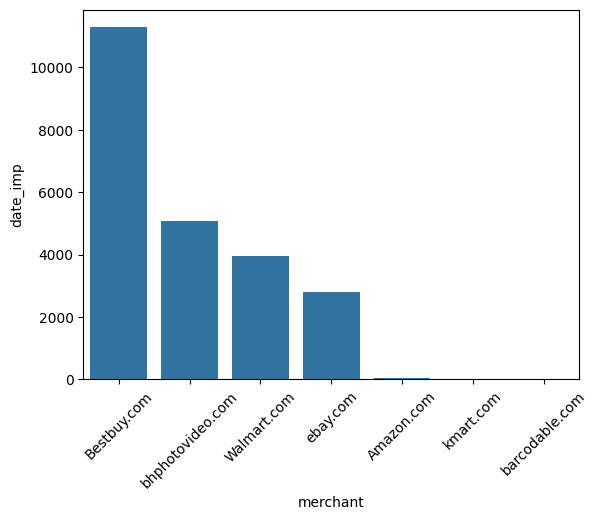

In [29]:
plt.xticks(rotation = 45)
sns.barplot( x = 'merchant', y = 'date_imp', data = aux1)

In [30]:
# Filtro de lojas
# seleção de lojas
df_best = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart = df2[df2['merchant'] == 'Walmart.com']
df_ebay = df2[df2['merchant'] == 'ebay.com']

### 3.1.1 Qual a categoria de produto mais vendida ?

In [31]:
aux = (df3.loc[:, ['date_imp_d', 'category_name']].groupby(['category_name']).count().
      sort_values('date_imp_d', ascending =  False))
aux.head(20)

,date_imp_d
category_name,
"tv, television, video",2130
"laptop, computer",1715
"speaker, portable, bluetooth",1104
"camera, mirrorless, photo",1072
"car, speaker, subwoofer",865
"receiver, amplifier, home",817
"camera, shoot",744
"drive, storage, hard",719
"drive, storage, internal",718


<Axes: xlabel='category_name', ylabel='date_imp_d'>

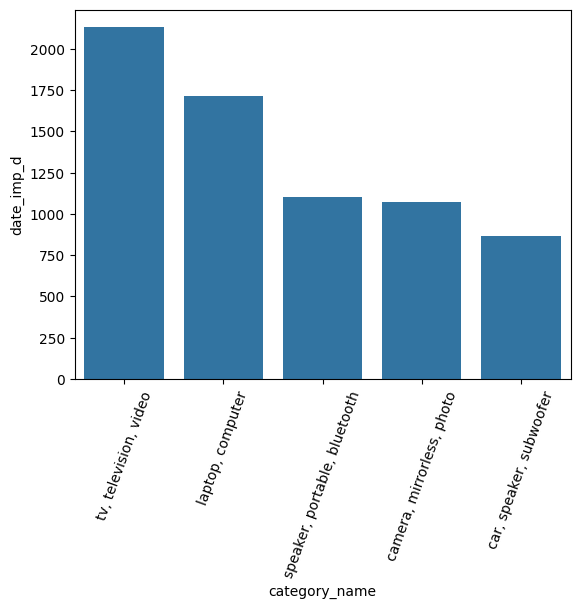

In [32]:
aux.reset_index(drop = True)
plt.xticks(rotation = 70)
sns.barplot(x = 'category_name', y = 'date_imp_d', data= aux.head())

### 3.1.2 As categorias mais vendidas por loja



In [33]:
aux = df3.loc[:,['date_imp_d', 'category_name', 'merchant']].groupby(['category_name', 'merchant']).count().sort_values('date_imp_d', ascending = False )
aux.head()

,,date_imp_d
category_name,merchant,
"laptop, computer",Bestbuy.com,1071
"tv, television, video",ebay.com,820
"speaker, portable, bluetooth",Bestbuy.com,758
"camera, mirrorless, photo",bhphotovideo.com,556
"car, speaker, subwoofer",Bestbuy.com,553


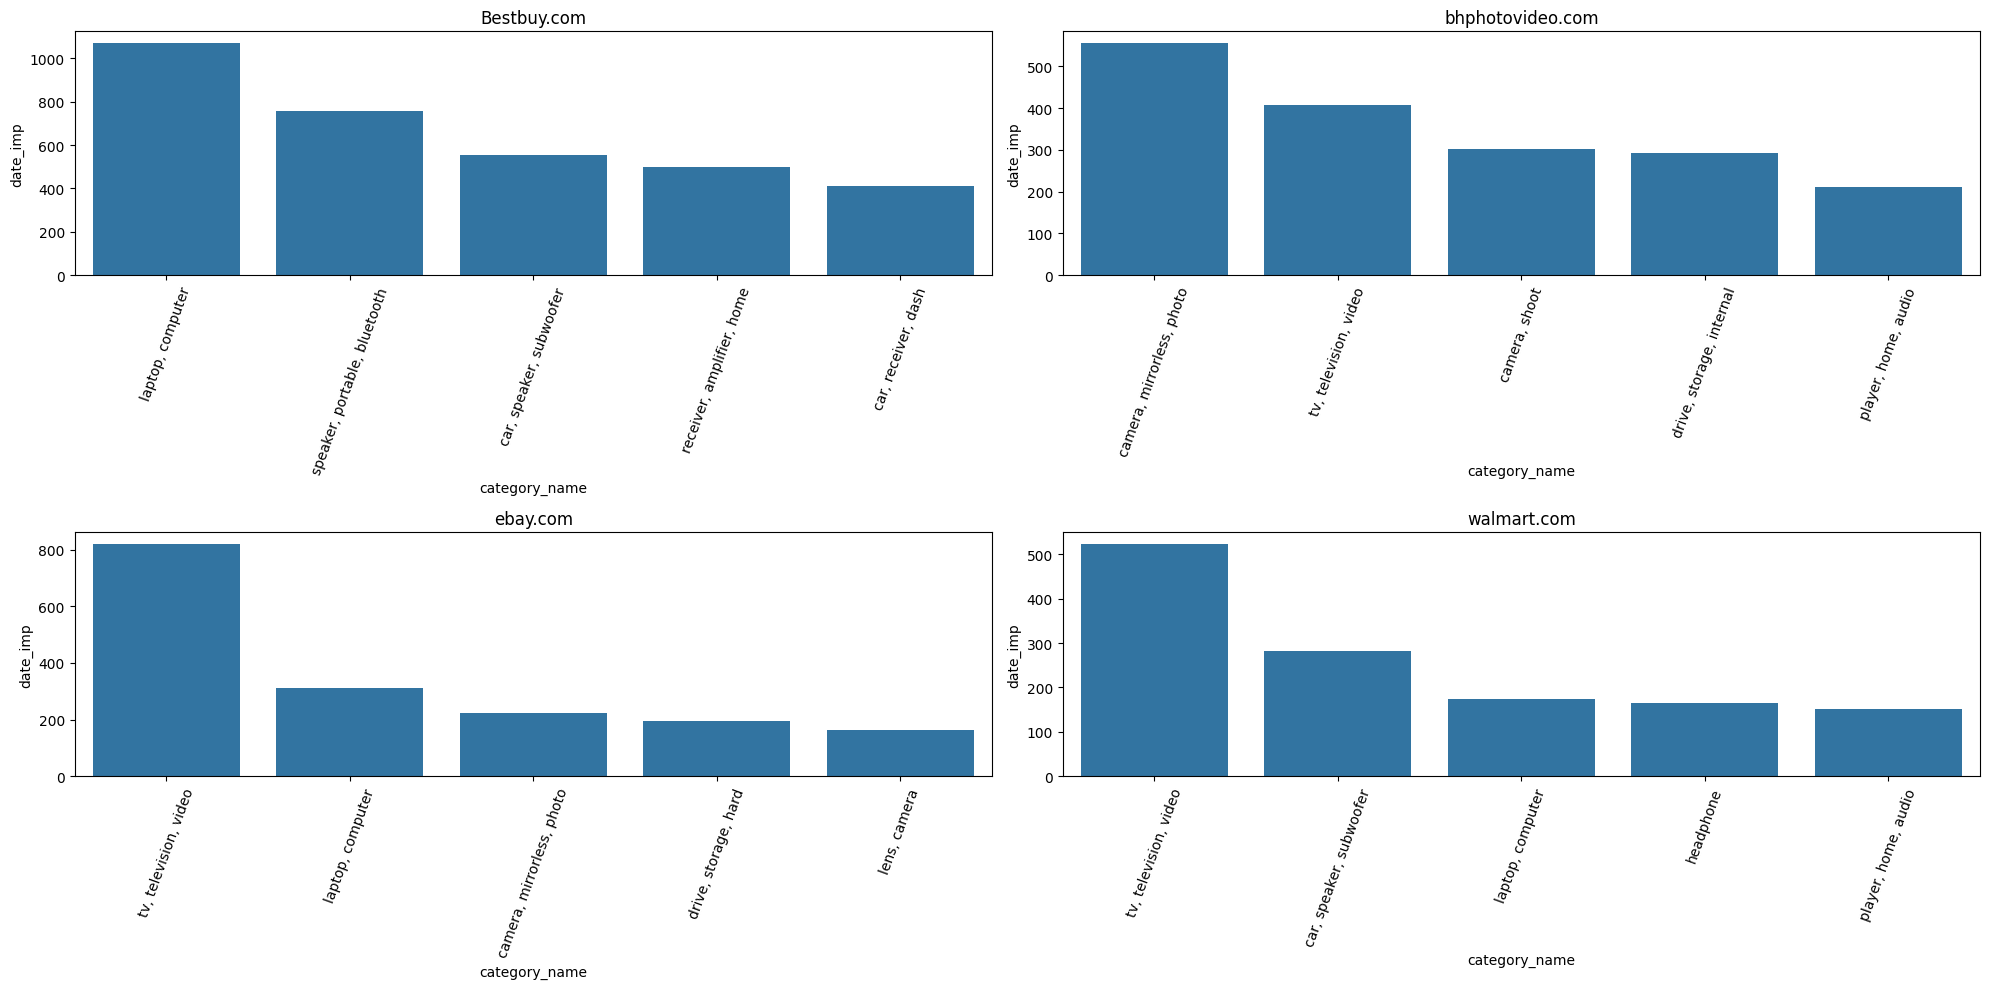

In [34]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux3 = (
    df_best[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('Bestbuy.com')
sns.barplot(x='category_name', y='date_imp', data=aux3.head())


plt.subplot(2,2,2)
aux4 = (
    df_bhp[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('bhphotovideo.com')
sns.barplot(x='category_name', y='date_imp', data=aux4.head())


plt.subplot(2,2,3)
aux5 = (
    df_ebay[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('ebay.com')
sns.barplot(x='category_name', y='date_imp', data=aux5.head())

plt.subplot(2,2,4)
aux6 = (
    df_walmart[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('walmart.com')
sns.barplot(x='category_name', y='date_imp', data=aux6.head())

plt.tight_layout()


## 3.2 Qual a marca mais vendida ?



### 3.2.1 No Geral ?

In [35]:
aux = df3.loc[:,['date_imp_d', 'brand']].groupby('brand').count().sort_values(by = 'date_imp_d', ascending = False )
aux.head()

,date_imp_d
brand,
Sony,3205
Samsung,1924
Apple,1771
Yamaha,721
Pioneer,559


In [36]:
ranger = list(range(0,5,1))

In [37]:
print(sns.color_palette("blend:#7AB,#EDA").as_hex())

['#77aabb', '#8fb4b8', '#a7beb4', '#bec9b1', '#d6d3ad', '#eeddaa']


In [38]:
cor = print(sns.color_palette("Spectral").as_hex())
print(sns.color_palette("Spectral").as_hex())# sns.color_palette("Spectral", as_cmap=True)

['#e2514a', '#fca55d', '#fee999', '#edf8a3', '#a2d9a4', '#47a0b3']
['#e2514a', '#fca55d', '#fee999', '#edf8a3', '#a2d9a4', '#47a0b3']


In [39]:
cor = print(sns.color_palette("Spectral").as_hex())
print(sns.color_palette().as_hex())# sns.color_palette("Spectral", as_cmap=True)

['#e2514a', '#fca55d', '#fee999', '#edf8a3', '#a2d9a4', '#47a0b3']
['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [40]:

sns.color_palette()# sns.color_palette("Spectral", as_cmap=True)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

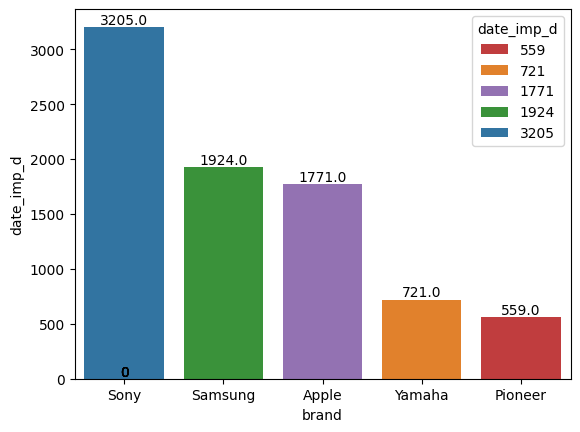

In [41]:
cor = ['#d62728', '#ff7f0e', '#9467bd', '#2ca02c', '#1f77b4' ]
ax = sns.barplot( x = 'brand', y = 'date_imp_d', palette = cor, hue='date_imp_d', data = aux.head())
#ax.bar_label(ax.containers[0], fontsize=10);
# Adicionando valores em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Exibir o gráfico
plt.show()

### 3.2.2 Por loja?

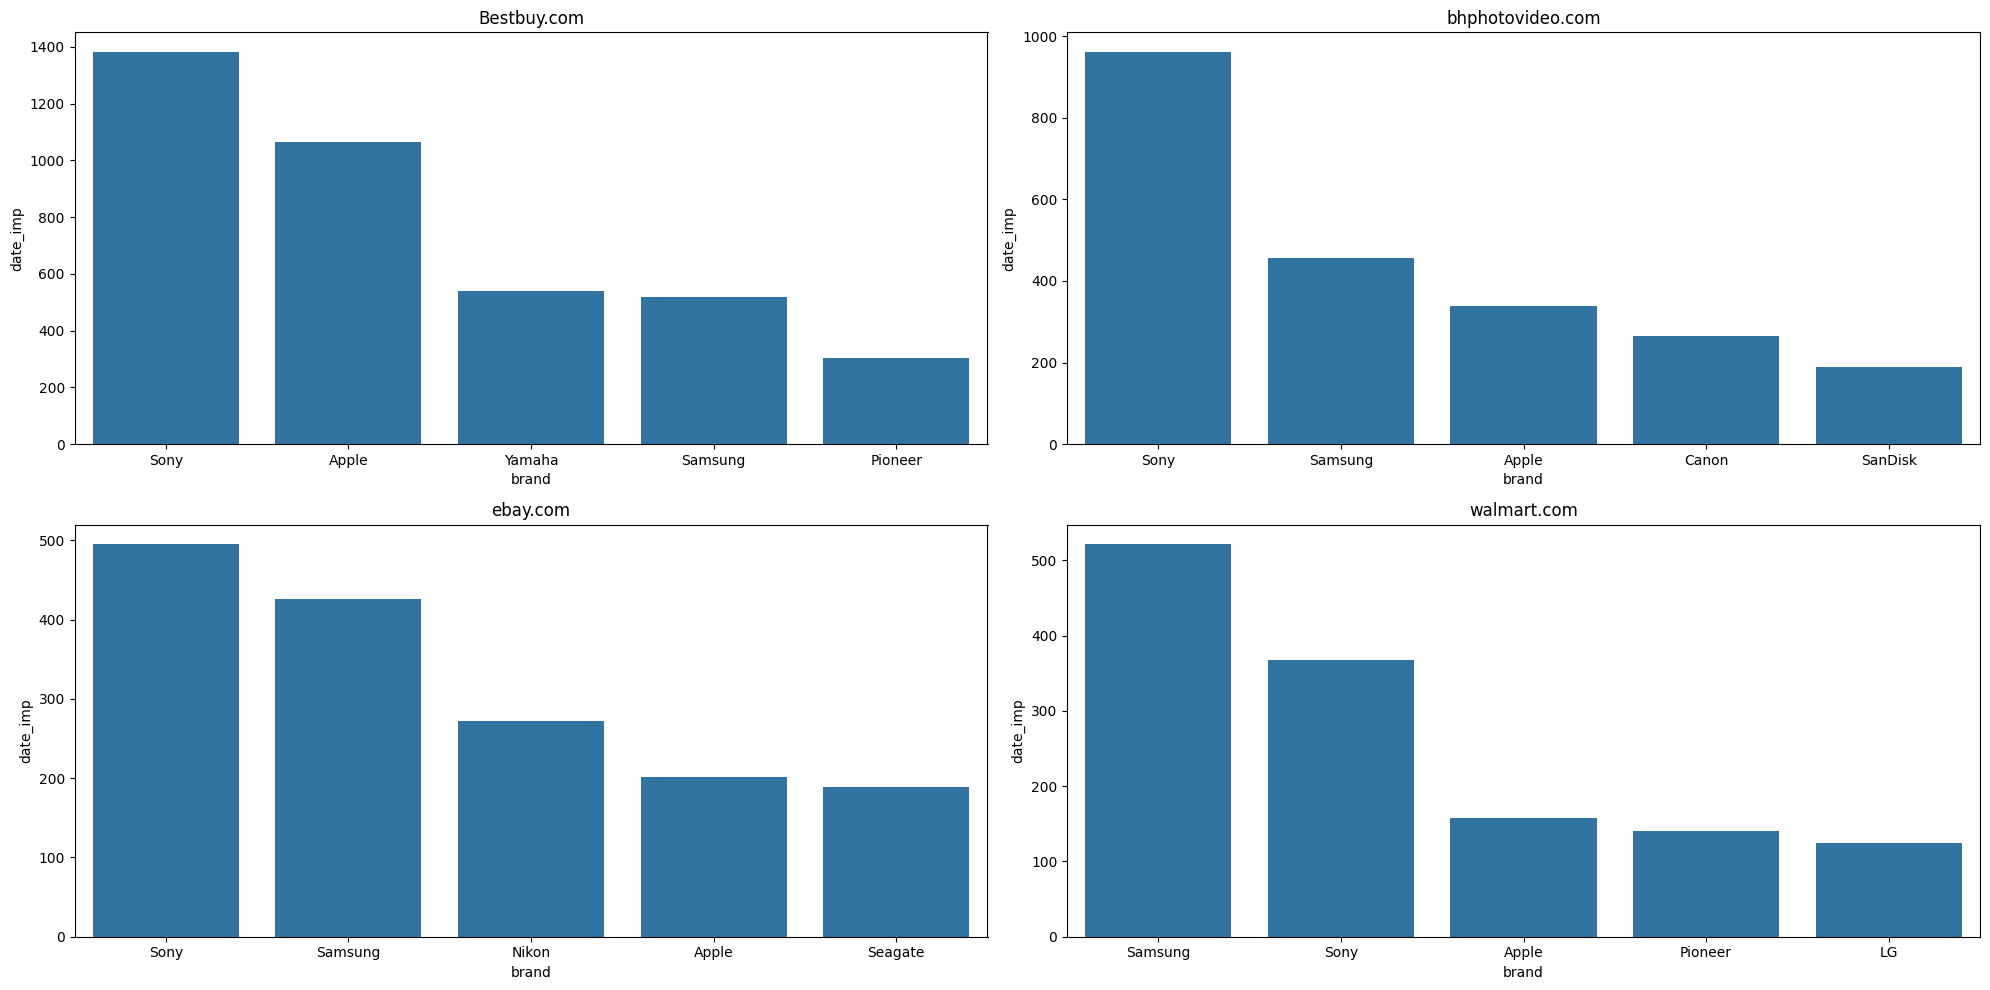

In [42]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux3 = (
    df_best[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=0)
plt.title('Bestbuy.com')
sns.barplot(x='brand', y='date_imp', data=aux3.head())


plt.subplot(2,2,2)
aux4 = (
    df_bhp[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=0)
plt.title('bhphotovideo.com')
sns.barplot(x='brand', y='date_imp', data=aux4.head())


plt.subplot(2,2,3)
aux5 = (
    df_ebay[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=0)
plt.title('ebay.com')
sns.barplot(x='brand', y='date_imp', data=aux5.head())

plt.subplot(2,2,4)
aux6 = (
    df_walmart[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=0)
plt.title('walmart.com')
sns.barplot(x='brand', y='date_imp', data=aux6.head())

plt.tight_layout()

## 3.3 Quais dias da semana que mais vende por lojas

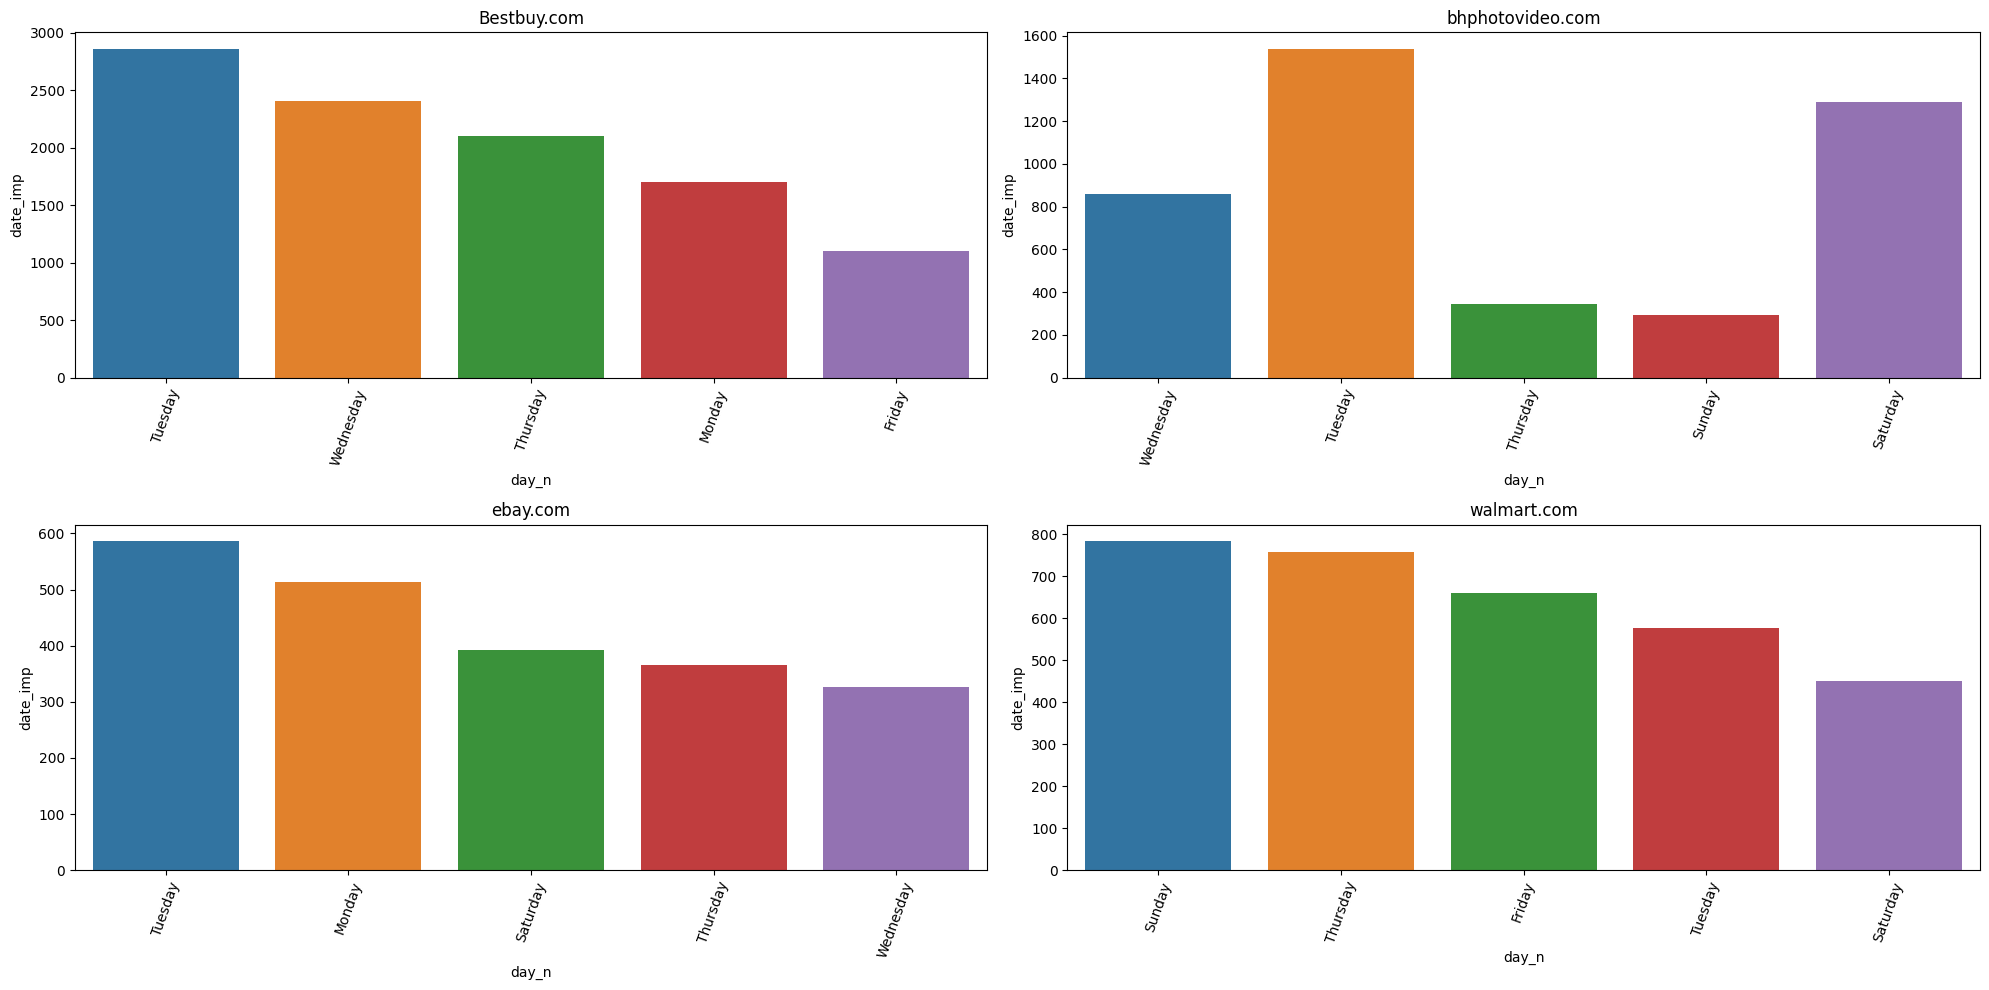

In [43]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux3 = (
    df_best[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('Bestbuy.com')
ax = sns.barplot(x='day_n', y='date_imp',hue = 'day_n', data=aux3.head())

#--------------

#_----------------------------
plt.subplot(2,2,2)
aux4 = (
    df_bhp[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="day_n", ascending=False)

)
plt.xticks(rotation=70)
plt.title('bhphotovideo.com')
sns.barplot(x='day_n', y='date_imp',hue = 'day_n', data=aux4.head())


plt.subplot(2,2,3)
aux5 = (
    df_ebay[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('ebay.com')
sns.barplot(x='day_n', y='date_imp',hue = 'day_n', data=aux5.head())

plt.subplot(2,2,4)
aux6 = (
    df_walmart[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('walmart.com')
sns.barplot(x='day_n', y='date_imp',hue = 'day_n', data=aux6.head())

plt.tight_layout()

## 3.4 Quais os meses que mais vendem ?

### 3.4.1 No geral ?

In [44]:
aux = df3.loc[:,['date_imp', 'month_n']].groupby('month_n').count().sort_values(by = 'date_imp', ascending = False)
aux.head()
aux.reset_index()

,month_n,date_imp
0,August,5004
1,July,4116
2,March,2517
3,December,2474
4,May,2127
5,September,1977
6,October,1859
7,June,1448
8,November,1264
9,April,357


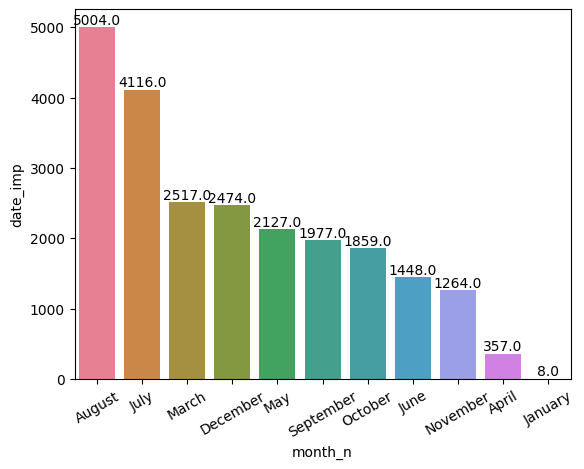

In [45]:

ax = sns.barplot( x ='month_n', y = 'date_imp',hue = 'month_n', data = aux )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.xticks(rotation = 30)
# Exibir o gráfico
plt.show()

### 3.4.2 Por loja

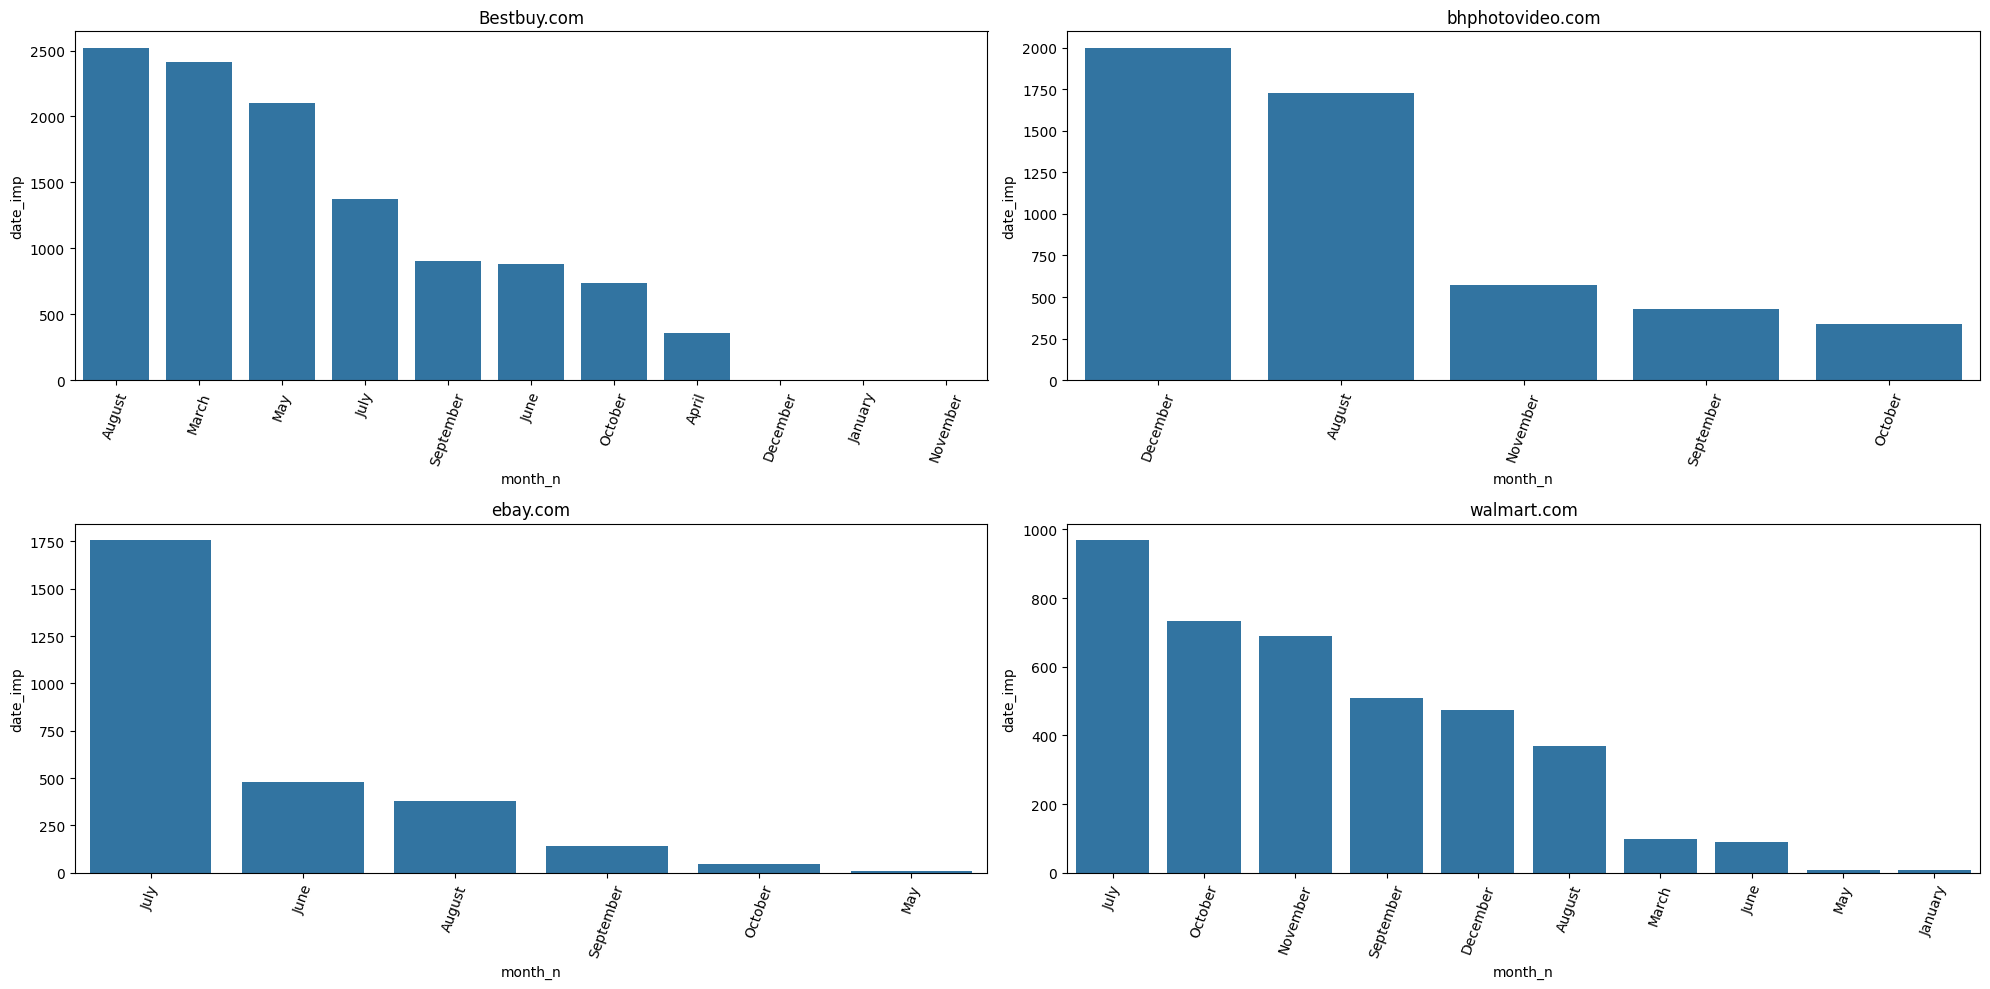

In [46]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux18 = (
    df_best[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('Bestbuy.com')
sns.barplot(x='month_n', y='date_imp', data=aux18)


plt.subplot(2,2,2)
aux19 = (
    df_bhp[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('bhphotovideo.com')
sns.barplot(x='month_n', y='date_imp', data=aux19)


plt.subplot(2,2,3)
aux20 = (
    df_ebay[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('ebay.com')
sns.barplot(x='month_n', y='date_imp', data=aux20)

plt.subplot(2,2,4)
aux21 = (
    df_walmart[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('walmart.com')
sns.barplot(x='month_n', y='date_imp', data=aux21)

plt.tight_layout()

## 3.5 Quais as semanas que mais vendem?

### 3.5.1 No geral

In [47]:
aux = df3.loc[:,['date_imp', 'week_number']].groupby('week_number').count().sort_values(by = 'date_imp', ascending = False)
aux.head()
aux.reset_index()

,week_number,date_imp
0,49,2330
1,35,1680
2,30,1539
3,31,1356
4,22,1140
5,29,1102
6,34,1088
7,9,893
8,33,811
9,38,799


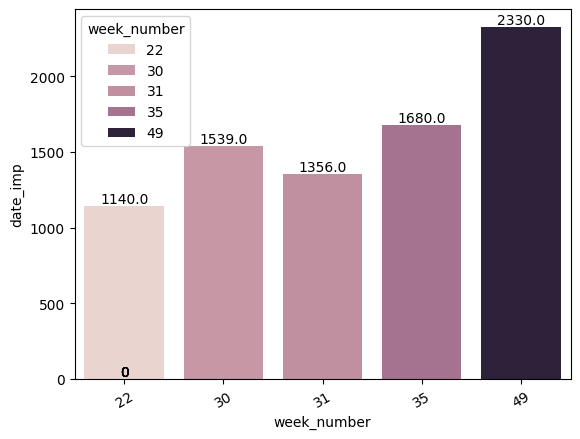

In [48]:
ax = sns.barplot( x ='week_number', y = 'date_imp',hue = 'week_number', data = aux.head() )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.xticks(rotation = 30)
# Exibir o gráfico
plt.show()

### 3.5.2 Por loja

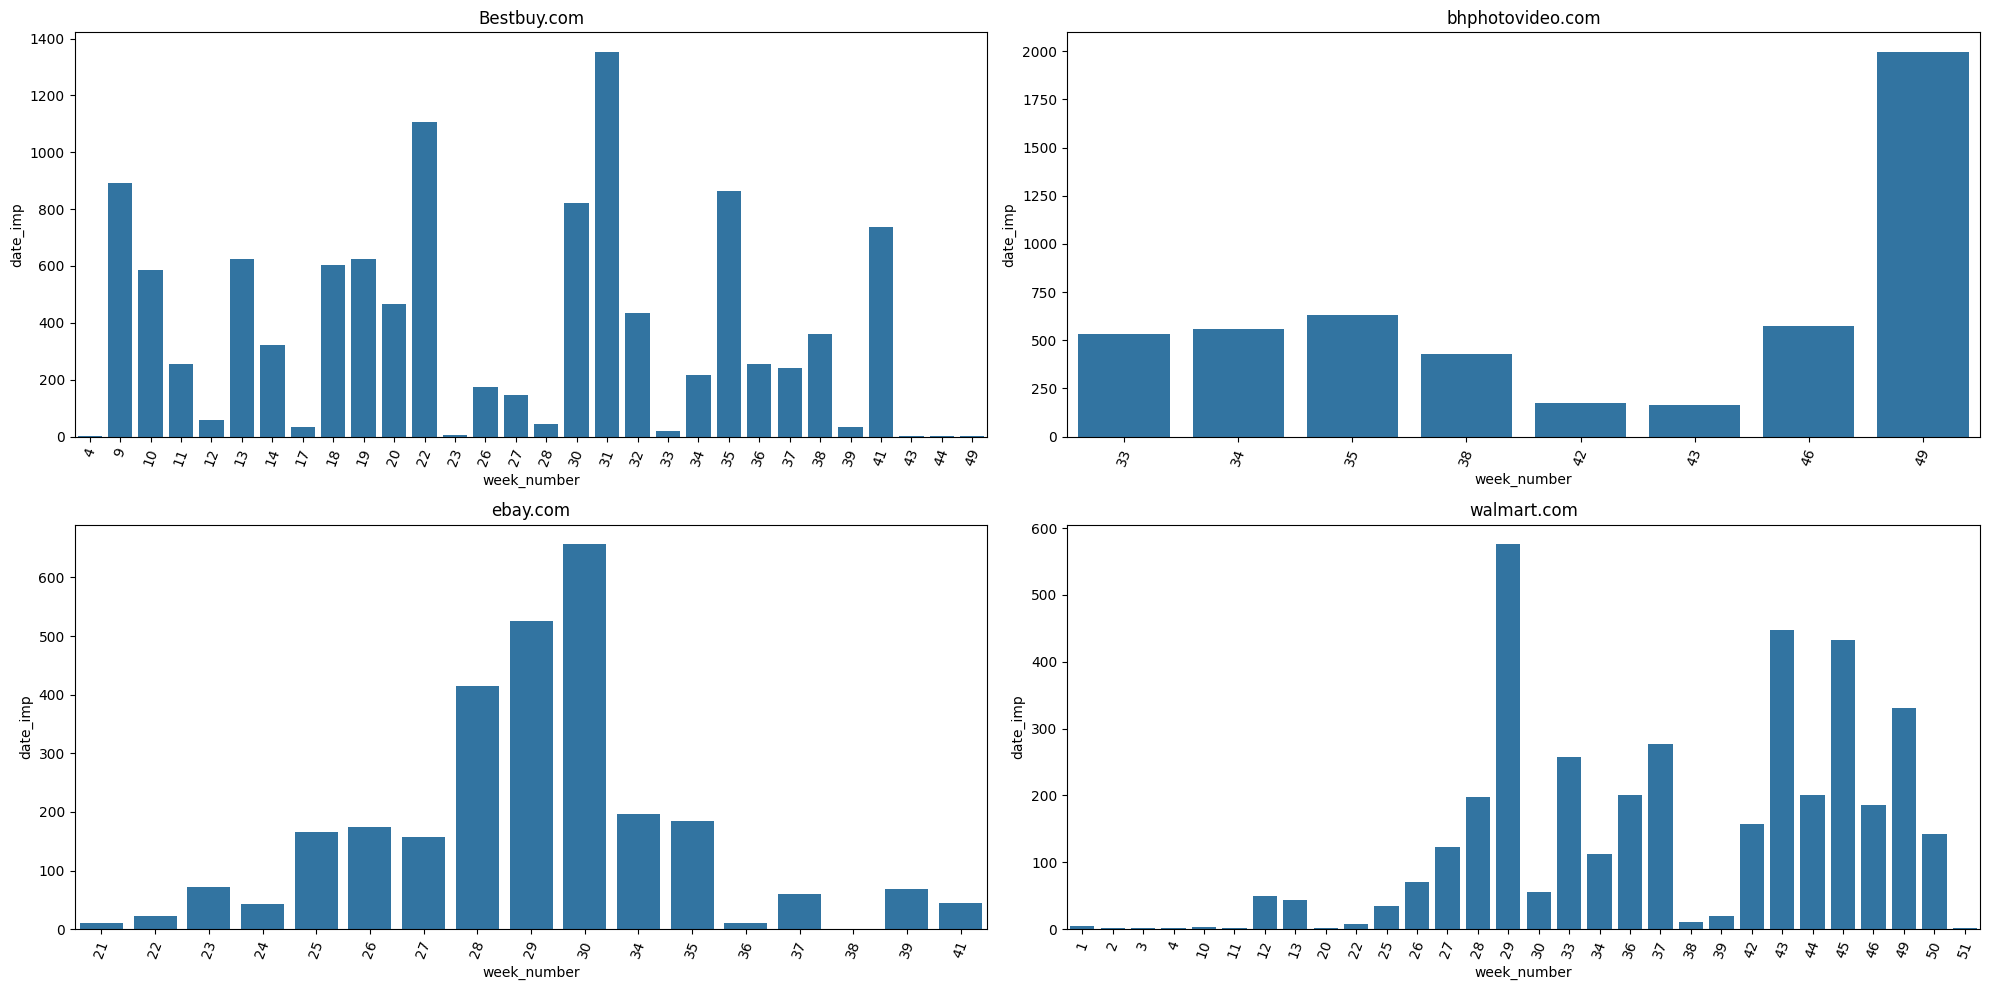

In [49]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux23 = (
    df_best[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('Bestbuy.com')
sns.barplot(x='week_number', y='date_imp', data=aux23)


plt.subplot(2,2,2)
aux24 = (
    df_bhp[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('bhphotovideo.com')
sns.barplot(x='week_number', y='date_imp', data=aux24)


plt.subplot(2,2,3)
aux25 = (
    df_ebay[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('ebay.com')
sns.barplot(x='week_number', y='date_imp', data=aux25)

plt.subplot(2,2,4)
aux26 = (
    df_walmart[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=70)
plt.title('walmart.com')
sns.barplot(x='week_number', y='date_imp', data=aux26)

plt.tight_layout()

# 4.0 Feature Engineering

In [50]:
df4 = df3.copy()

## 4.1 Categoria mais vendida da Bestbuy

In [51]:
df_best.loc[:,['date_imp', 'category_name']].groupby(['category_name']).count().sort_values(by='date_imp', ascending = False )

,date_imp
category_name,
"laptop, computer",1071
"speaker, portable, bluetooth",758
"car, speaker, subwoofer",553
"receiver, amplifier, home",500
"car, receiver, dash",411
"tv, television, video",379
"ipod, player",355
"speaker, audio, home",336
"headphone, earbud, ear",331


In [52]:
# Categoria mais vendida no Bestbuy
df_speaker = df_best[df_best['category_name'] == 'speaker, portable, bluetooth'] 

In [53]:
df_speaker.isnull().sum()

date_imp           0
date_imp_d         0
cluster            0
category_name      0
name               0
price              0
disc_price         0
merchant           0
disc_percentage    0
is_sale            0
imp_count          0
brand              0
p_description      0
currency           0
date_added         0
date_seen          0
date_updated       0
weight             0
date_imp_d.1       0
day_n              0
month              0
month_n            0
day                0
week_number        0
price_std          0
Hours              0
dtype: int64

In [54]:
dataset = ( df_laptop.groupby(['name', 'week_number'  ]).
           agg({'disc_price':'mean', 'date_imp':'count'}).
           reset_index() )
dataset

NameError: name 'df_laptop' is not defined

In [ ]:
# criando dataframe dos valores
x_price = dataset.pivot( index = 'week_number', columns = 'name', values = 'disc_price')

x_price = pd.DataFrame( x_price.to_records())
x_price.head()

In [ ]:
y_demand = dataset.pivot(index = 'week_number', columns = 'name', values = 'date_imp')
y_demand = pd.DataFrame( y_demand.to_records())
y_demand.head()

# 5.0 Descrição dos novos dataframes

## 5.1 Data Dimension

In [ ]:
print(f'Number of rows:{x_price.shape[0]}')
print(f'Number of columns:{x_price.shape[1]}')


In [ ]:
print(f'Number of rows:{y_demand.shape[0]}')
print(f'Number of columns:{y_demand.shape[1]}')

## 5.2 Data Types

In [ ]:
x_price.dtypes

In [ ]:
y_demand.dtypes

## 5.3 Check NA

In [ ]:
x_price.isnull().sum()

## 5.4 Replace NAN

In [ ]:
# A função round() do Python arredonda números de ponto flutuante para um número específico de casas decimais
price_median = np.round( x_price.median(),2)
x_price.fillna( price_median, inplace = True)
x_price.head()

In [ ]:
y_demand.fillna(0, inplace = True)
y_demand.head()

## 5.6 Descriptive Statistics

In [ ]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(x_price.apply(np.mean)).T
ct2 = pd.DataFrame(x_price.apply(np.median)).T

# Dispersion - sdt, min, max, range, skew, kurtosis

d1 = pd.DataFrame( x_price.apply(np.std)).T
d2 = pd.DataFrame( x_price.apply(np.min)).T
d3 = pd.DataFrame( x_price.apply(np.max)).T
d4 = pd.DataFrame( x_price.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( x_price.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( x_price.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

In [ ]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(y_demand.apply(np.mean)).T
ct2 = pd.DataFrame(y_demand.apply(np.median)).T

# Dispersion - sdt, min, max, range, skew, kurtosis

d1 = pd.DataFrame( y_demand.apply(np.std)).T
d2 = pd.DataFrame( y_demand.apply(np.min)).T
d3 = pd.DataFrame( y_demand.apply(np.max)).T
d4 = pd.DataFrame( y_demand.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( y_demand.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( y_demand.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

# 5.0 EDA 

In [ ]:
#plt.figure(figsize=(30,10))
#plt.subplot(2,1,1)
aux1 = pd.DataFrame(x_price.apply(lambda x: x.median())).reset_index()
aux1.columns = ['products', 'price']
aux1.head()
#plt.xticks(rotation = 35)
#sns.barplot(x='products', y ='price', data=aux1.head())


In [ ]:


#plt.subplot(2,1,2)
aux2 = pd.DataFrame(y_demand.apply(lambda x: x.sum())).reset_index()
aux2.columns = ['products', 'demand']
aux2.head()
#plt.xticks(rotation=70)
#sns.barplot(x='products', y='demand', data=aux2.head())


In [ ]:
len(x_price.columns)

In [ ]:
# observo a ditribuição de preço pela pelas semanas
# problema de limite 40 e len(x_price.columns) é 42
plt.figure(figsize=(20,60))
for k in np.arange(1, 40, 1):
    plt.subplot(20,2, k)
    sns.barplot(data=x_price, x=x_price['week_number'], y=x_price[x_price.columns[k]])
    plt.title(x_price.iloc[:,k].name)
    plt.ylabel('')
    plt.tight_layout()


In [ ]:
# observo a ditribuição de preço pela pelas semanas
# problema de limite 40 e len(x_price.columns) é 42
plt.figure(figsize=(20,60))
for k in np.arange(1, 40, 1):
    plt.subplot(20,2, k)
    sns.barplot(data=y_demand, x= y_demand['week_number'], y=y_demand[y_demand.columns[k]])
    plt.title(y_demand.iloc[:,k].name)
    plt.ylabel('')
    plt.tight_layout()


# 6.0 Machine Learning

## 6.1 BOOM 2 Wireless Bluetooth Speaker - Indigo

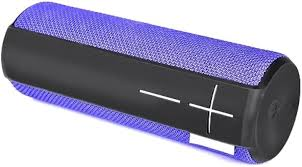

In [ ]:
x_speaker = x_price['BOOM 2 Wireless Bluetooth Speaker - Indigo']
y_speaker = y_demand['BOOM 2 Wireless Bluetooth Speaker - Indigo']

X_speaker = sm.add_constant( x_speaker)
model     = sm.OLS(x_speaker, X_speaker, axis = 1)  # Método do mínimos quadrado
results   = model.fit()
print( results.summary() )

## 6.2 Todas as colunas

In [ ]:
results_values_speaker = {
    "name": [], 
    "price_elasticity": [], 
    "mean_price": [], 
    "mean_quantity": [],  # Demanda
    "intercept": [],      # coeficiente linear
    "slope": [],          # coeficicente angular
    "rsquared": [],       # r²
    "p_value": [],        # significância
}

for column in x_price.columns[1:]:
    column_points = []
    for i in range( len(x_price[column])):
        column_points.append((x_price[column][i], y_demand[column][i]))
    df = pd.DataFrame( list(column_points), columns = ["x_price", "y_demand"])

    x_speaker = df["x_price"]
    y_speaker = df["y_demand"]
    X_speaker = sm.add_constant(x_speaker)
    model     = sm.OLS(y_speaker, X_speaker)
    results   = model.fit()

    if results.f_pvalue < 0.05:
        rsquared         = results.rsquared
        p_value          = results.f_pvalue
        intercept, slope = results.params
        mean_price       = np.mean(x_speaker)
        mean_quantity    = np.mean(y_speaker)

        price_elasticity = slope * (mean_price / mean_quantity)

        results_values_speaker['name']            .append(column)
        results_values_speaker['price_elasticity'].append(price_elasticity)
        results_values_speaker['mean_price']      .append(mean_price)
        results_values_speaker['mean_quantity']   .append(mean_quantity)
        results_values_speaker['intercept']       .append(intercept)
        results_values_speaker['slope']           .append(slope)
        results_values_speaker['rsquared']        .append(rsquared)
        results_values_speaker['p_value']         .append(p_value)

df_elasticity = pd.DataFrame(results_values_speaker) 

In [ ]:
df_elasticity.to_csv('/home/win/Documentos/pa06/data/df_elasticity.csv', index = False)

In [ ]:
df_elasticity

# 7.0 Elasticidade

In [ ]:
df_elasticity['ranking'] = (
    df_elasticity.loc[:, 'price_elasticity'].rank( ascending = True).astype(int)
)

df_elasticity.reset_index( drop = True, inplace = True)

plt.figure( figsize = ( 12, 4) )
plt.hlines(
    y         = df_elasticity["ranking"],
    xmin      = 0,
    xmax      = df_elasticity["price_elasticity"], 
    alpha     = 0.5,
    linewidth = 3,
)
for name, p in zip( df_elasticity["name"], df_elasticity["ranking"]):
    plt.text(4, p, name)

for x, y, s in zip(
                            df_elasticity["price_elasticity"], 
                            df_elasticity["ranking"],
                            df_elasticity["price_elasticity"]
    ):
    
    plt.text(
        x, 
        y, 
        round(s, 2),
        horizontalalignment = "right" if x < 0 else "left", 
        verticalalignment   = "center",
        fontdict            = {"color": "red" if x < 0 else  "green", "size": 10}, 
    )

plt.gca().set( ylabel = "Ranking Number", xlabel = "Price Elasticity")
plt.title( "Price Elasticity")
plt.grid( linestyle    = "--")

In [ ]:
df_elasticity["ranking"] = (
    df_elasticity.loc[:, "price_elasticity"].rank(ascending=True).astype(int)
)
df_elasticity = df_elasticity.reset_index(drop=True)

plt.figure(figsize=(12, 4))
plt.hlines(
    y=df_elasticity["ranking"],
    xmin=0,
    xmax=df_elasticity["price_elasticity"],
    alpha=0.5,
    linewidth=3,
)
for name, p in zip(df_elasticity["name"], df_elasticity["ranking"]):
    plt.text(4, p, name)

for x, y, s in zip(
    df_elasticity["price_elasticity"],
    df_elasticity["ranking"],
    df_elasticity["price_elasticity"],
):
    plt.text(
        x,
        y,
        round(s, 2),
        horizontalalignment="right" if x < 0 else "left",
        verticalalignment="center",
        fontdict={"color": "red" if x < 0 else "green", "size": 10},
    )
plt.gca().set(ylabel="Ranking Number", xlabel="Price Elasticity")
plt.title("Price Elasticity")
plt.grid(linestyle="--")



In [ ]:
df_order_elasticity = df_elasticity[
                                   ["ranking", "name", "price_elasticity"]
                                   ].sort_values(by="price_elasticity", ascending=False)

df_order_elasticity

# 8.0 Business Performance

In [ ]:
abs(-1.515)

In [ ]:
resultado_faturamento = {
    "name"                :[], 
    "faturamento_atual"   :[], 
    "faturamento_reducao" :[],
    "perda_faturamento"   :[], 
    "faturamento_novo"    :[],
    "variacao_faturamento":[],
    "variacao_percentual" :[],
}

for i in range( len(df_order_elasticity)):
    preco_atual_medio   = x_price [df_order_elasticity["name"][i]].mean()
    demanda_atual       = y_demand[df_order_elasticity["name"][i]].sum()
# SITUAÇÃO HIPOTETICA -  desconto de 10% gerar um aumento de demanda de 10%
    reducao_preco       = preco_atual_medio * 0.9 # Desconto de 10% 
    aumento_demanda     = abs(0.1 * df_order_elasticity["price_elasticity"][i]) # Aumento da demanda

    demanda_nova        = aumento_demanda * demanda_atual

    faturamento_atual   = round( preco_atual_medio * demanda_atual, 2)
    faturamento_novo    = round( reducao_preco * demanda_nova, 2)

    faturamento_reducao = round(faturamento_atual * 0.9, 2) # Novo faturamento sem levar em conta a demanda

    perda_faturamento   = round(faturamento_novo - faturamento_reducao, 2 ) # - o perdido

    variacao_faturamento= round(faturamento_novo - faturamento_atual, 2)

    variacao_percentual = round( ((faturamento_novo - faturamento_atual) / faturamento_atual ) * 100, 2)

    
    resultado_faturamento["name"].                append(df_order_elasticity["name"][i])
    resultado_faturamento["faturamento_atual"].   append(faturamento_atual)
    resultado_faturamento["faturamento_reducao"]. append(faturamento_reducao)
    resultado_faturamento["perda_faturamento"].   append(perda_faturamento)
    resultado_faturamento["faturamento_novo"].    append(faturamento_novo)
    resultado_faturamento["variacao_faturamento"].append(variacao_faturamento)
    resultado_faturamento["variacao_percentual"]. append(variacao_percentual)

resultado = pd.DataFrame( resultado_faturamento)
resultado.head()







In [ ]:
resultado.to_csv("/home/win/Documentos/pa06/data/business_performance.csv", index = False)

# 9.0 Cross Price Elasticity

In [ ]:
# Pegando todos os valores de x_price
new_df = x_price.copy()

# Pegando os valores y_demand com nome da coluna 
new_df['y_value-'+'BOOM 2 Wireless Bluetooth Speaker - Indigo'] = y_demand['BOOM 2 Wireless Bluetooth Speaker - Indigo']

multi_xvalues   = new_df.loc[:, new_df.columns[1:-1]]
multi_yvalues   = new_df.loc[:, new_df.columns[-1]]

# Obter o valaor médio do preço do produto
mean_xvalues    = np.mean(multi_xvalues)

#Obter o valor médio da demanda
mean_yvalues    = np.mean(multi_yvalues)

# Regrerssão Linear 
x               = sm.add_constant(multi_yvalues)
model           = sm.OLS( multi_yvalues, x, missing = 'drop')
result          = model.fit()

# Obtendo os resultados 
results_summary  = result.summary()

# p-valores para coeficiente
p_value         = result.pvalues

# Transformando os resultado em um dataframe
results_as_html = results_summary.tables[1].as_html()
new_dataframe   = pd.read_html( results_as_html, header = 0, index_col = 0 ) [0]

# Adicionado o p-valor ao dataframe
new_dataframe['p_value']          = p_value

# Definindo o nome do produto como index
new_dataframe['mean']             = 'name'
new_dataframe.reset_index()

# Calculando a elasticidade cruzada
new_dataframe['mean']             = mean_xvalues
new_dataframe['price_elasticity'] = round((new_dataframe.coef)*(new_dataframe['mean']/mean_yvalues), 2)

new_dataframe                     = new_dataframe.reset_index()
pvalue_signicant                  = new_dataframe['p_value']

# Verificando a hipótese nula (inclinação por produto)
new_dataframe['BOOM 2 Wireless Bluetooth Speaker - Indigo' + 'CPE']  = np.where((pvalue_signicant > 0.05), 'No Effect', new_dataframe['price_elasticity'])
new_dataframe.dropna()

In [ ]:
def crossprice(df_x, df_y, column_name):
    # Pegando todos os valores de x_price
    new_df = df_x.copy()

    # Pegando os valores y_demand com nome da coluna
    new_df['y_value-'+ column_name] = df_y[column_name]

    multi_xvalues = new_df.loc[:, new_df.columns[1:-1]]
    multi_yvalues = new_df.loc[:, new_df.columns[-1]]

    # Obter o valor medio do preço do produto
    mean_values   = np.mean(multi_xvalues)
    
    # Obter o valor medio demanda 
    mean_yvalues  = np.mean(multi_yvalues)

    # Regressão Linear

    x     = sm.add_constant(multi_xvalues)
    model = sm.OLS(multi_yvalues, x, missing = 'drop')
    result= model.fit()

    # Obtendo os resultados 
    results_summary = result.summary()

    # p-valores para coeficiente
    p_value         = result.pvalues

    # Transformando os resultados em uma dataframe

    results_as_html = results_summary.tables[1].as_html()
    new_dataframe   = pd.read_html( results_as_html, header = 0, index_col = 0)[0]

    # Adicionando o p-valor ao dataframe
    new_dataframe['p_value'] = p_value

    # Definindo o nome do produto como index
    new_dataframe.index.name = 'name'
    new_dataframe.reset_index()

    # Calculando a elasticidade cruzada
    new_dataframe['mean']             = mean_xvalues
    new_dataframe['price_elasticity'] = round(( new_dataframe.coef) * (new_dataframe['mean']/mean_yvalues), 2)

    new_dataframe                     = new_dataframe.reset_index()
    pvalue_signicant                  = new_dataframe['p_value']

    # Verificando a hipótese nula (inclinação por produto)
    new_dataframe[column_name+'CPE'] = np.where(( pvalue_signicant > 0.05), 'No Effect', new_dataframe['price_elasticity'])
    new_dataframe.dropna()
    return new_dataframe[[ 'name', column_name + 'CPE' ]]

In [ ]:
result_df = pd.DataFrame()
for column in x_price.columns[1:]:
    result_df[['name', column + 'CPE']] = crossprice(x_price, y_demand, column)

In [ ]:
result_df.to_csv('/home/win/Documentos/pa06/data/crossprice.csv', index = False)

In [ ]:
result_df